In [1]:
IS_LINUX = False
from sys import platform
if platform == "linux" or platform == "linux2":
  IS_LINUX = True
if IS_LINUX:
    !pip install tensorflow-gpu
    !pip install jsonpickle
    !pip install openpyxl==2.6.3

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 3.8MB 51.6MB/s 
     |████████████████████████████████| 450kB 57.9MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

     |████████████████████████████████| 174kB 30.0MB/s 
  Created wheel for openpyxl: filename=openpyxl-2.6.3-py2.py3-none-any.whl size=245700 sha256=80b1fc1871495daa40838aa6bfa3da7d6ebf02466212e78944f0c21ff0b9a099
  Stored in directory: /root/.cache/pip/wheels/51/fa/dc/7eb403214c40a01befafce3ec0d215176d451d106a431d6781
Successfully built openpyxl
  Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [2]:
if IS_LINUX:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
if IS_LINUX:
    %cd /content/drive/My\ Drive/MastersThesis
    !ls
    !pwd
    import sys
    sys.path.append('./')

/content/drive/My Drive/MastersThesis
 auto_class_altern_report.xlsx	 global_functions.py
 autoclassifier_report.xlsx	 models.py
 auttrainedoff.xlsx		 output_dir
 callbacks.py			 Playground.ipynb
 classifier_report.xlsx		 predictors.py
 config.py			 __pycache__
 constants.py			 README.md
 datasets.py			 reporter.py
 Dokumentovanie			 run.py
 experiments.py			 sample.xlsx
 fashion_mnist_correct.txt	 training_data.py
 fashion_mnist_incorrect.txt	 training.py
'for_training colab.ipynb'	 vizualizer.py
'for_training local.ipynb'	'zaujmave citanie.pdf'
/content/drive/My Drive/MastersThesis


In [4]:
import global_functions
global_functions.on_start()

GPU OK


In [5]:
import tensorflow as tf
print(tf.__version__)
#2.0.0

2.0.0


In [0]:
import experiments, datasets, training_data
import models
import constants
import vizualizer

In [0]:
#basic_model = models.BasicModelProvider()(datasets.FashionMnistDataset())
trained_models.autoencoder.set_autoencoder_trainable(False)
existing_model =  models.ExistingModelProvider(lambda: trained_models)


In [0]:
exp = experiments.ExperimentAutoencoder(datasets.MnistDataset, models.BasicModelProvider(),
                                                    training_data.BasicTrainingDataGeneratorAutoencoder())
result = exp.train(training_data.BasicTrainParametersAutoencoder(100, 128, 20, True, 1.0, 1e-5,
                                                                             None,
                                                                             False))

In [0]:

exp = experiments.ExperimentClassifier(datasets.FashionMnistDataset, existing_model,
                                                   training_data.BasicTrainingDataGeneratorClassifier())
result = exp.train(training_data.BasicTrainParametersClassifier(100, 128, 20, True, 1.0, 1e-6, True,
                                                                            None,
                                                                            False))

In [5]:
import importlib
import vizualizer, experiments , constants, datasets, models, predictors, training_data, training, reporter
importlib.reload(vizualizer)
importlib.reload(experiments)
importlib.reload(constants)
importlib.reload(datasets)
importlib.reload(models)
importlib.reload(predictors)
importlib.reload(training_data)
importlib.reload(training)
importlib.reload(reporter)
import numpy as np

Using TensorFlow backend.


In [14]:
# training.TrainingFashionMnistAveragePoolingWithoutDense.autoencoder_classifier_together(True)
# training.TrainingFashionMnistAveragePoolingWithoutDense.autoencoder_trained_then_classifier(False)


#training.TrainingFashionMnistAveragePoolingWithoutDense.autoencoder_trained_then_classifier(True)
autoencoder_layers_trainable_during_classification_training = False
for rate in [0.25, 0.5, 1]:
    model_provider = experiments.ExperimentBase.provide_existing_model_from_log(
        constants.ExperimentsPaths.FashionMnist.BasicModelBuilder.AUTOENCODER,
        experiments.ExperimentAutoencoder.predicate_for_choosing_best_model())
    autoencoder_trained_model = model_provider()
    model_with_classifier = models.BasicModelBuilderWithAveragePoolingWithoutDenseBuilder.get_provider()(
        datasets.FashionMnistDataset())
    model_with_classifier.autoencoder.set_weights(autoencoder_trained_model.autoencoder.get_weights())
    result_model = models.ExistingModelProvider(model_with_classifier)
    exp = experiments.ExperimentClassifier(datasets.FashionMnistDataset,
                                           result_model,
                                           training_data.BasicTrainingDataGeneratorClassifier())
    result = exp.train(training_data.BasicTrainParametersClassifier(
        60, 128, 20, True, rate, 1e-6,
        autoencoder_layers_trainable_during_classification_training,
        constants.ExperimentsPaths.FashionMnist.BasicModelBuilderWithAveragePoolingWithoutDenseBuilder.AUTOENCODER_TRAINED_CLASSIFIER_AUTO_L_ON
        if autoencoder_layers_trainable_during_classification_training else
        constants.ExperimentsPaths.FashionMnist.BasicModelBuilderWithAveragePoolingWithoutDenseBuilder.AUTOENCODER_TRAINED_CLASSIFIER_AUTO_L_OFF,
        True)
    )

Nove OK
start_batch_index: 15000 ,end_batch_index: 30000
Classifier trainable weights:  2
Train on 15000 samples, validate on 10000 samples
Epoch 1/60
15000/15000 - 2s - loss: 2.4598 - accuracy: 0.1337 - val_loss: 2.0602 - val_accuracy: 0.3314
Epoch 2/60
15000/15000 - 1s - loss: 2.1424 - accuracy: 0.2163 - val_loss: 1.8709 - val_accuracy: 0.4518
Epoch 3/60
15000/15000 - 1s - loss: 1.9657 - accuracy: 0.2807 - val_loss: 1.7408 - val_accuracy: 0.5108
Epoch 4/60
15000/15000 - 1s - loss: 1.8529 - accuracy: 0.3317 - val_loss: 1.6489 - val_accuracy: 0.5449
Epoch 5/60
15000/15000 - 1s - loss: 1.7721 - accuracy: 0.3658 - val_loss: 1.5776 - val_accuracy: 0.5650
Epoch 6/60
15000/15000 - 1s - loss: 1.7169 - accuracy: 0.3851 - val_loss: 1.5258 - val_accuracy: 0.5855
Epoch 7/60
15000/15000 - 1s - loss: 1.6640 - accuracy: 0.4088 - val_loss: 1.4812 - val_accuracy: 0.5856
Epoch 8/60
15000/15000 - 1s - loss: 1.6429 - accuracy: 0.4118 - val_loss: 1.4475 - val_accuracy: 0.5914
Epoch 9/60
15000/15000 - 1s 

In [0]:
from copy import deepcopy

deep_copy_weights = deepcopy(new.autoencoder.get_weights())

deep_copy_weights[0]

In [0]:
# newModel = models.BasicModelBuilderWithAveragePoolingWithDenseProvider() (datasets.FashionMnistDataset())
# training.TrainingFashionMnist

# experiment_results_layer_off = []
# for rate in [0.01,0.1, 0.25, 0.5, 1]:

# for rate in [0.05, 0.1, 0.25, 0.5]:
for repat in range(1): BN
    for rate in [1]:
        exp = experiments.ExperimentClassifier(datasets.FashionMnistDataset, models.BasicModelProviderExistingModelPro,
                                               training_data.BasicTrainingDataGeneratorClassifier())
        exp.train(training_data.BasicTrainParametersClassifier(100, 128, 40, True, rate, 1e-6, False,
                                                                        None, False))
    
#     experiment_results_layer_off.append(result)

In [0]:
new.autoencoder.set_autoencoder_trainable(True)
len(new.classifier.trainable_weights)
new.classifier.layers[1].get_weights()

In [0]:



results = experiments.ExperimentBase.load_experiment_results(
    constants.ExperimentsPaths.FashionMnist.BasicModelBuilder.CLASSIFIER_EN_LAYERS_ON, True)
experiment = results[-1].experiment
trained_models_classifier = experiment.model_provider()
# results = experiments.ExperimentBase.load_experiment_results(constants.ExperimentsPaths.FashionMnist.AUTOENCODER, True)
# experiment = results[-1].experiment
# trained_models_autoencoder = experiment.model_provider()

#print(len(results))    
# vizualizer.Vizualizer.vizualize([result.train_history for result in results], 0.5)

In [0]:
trained_models_classifier.classifier.summary()

In [0]:
fashion_mnist = datasets.FashionMnistDataset()
predictions_autoencoder = experiments.ExperimentAutoencoder.predict_test(fashion_mnist ,trained_models)
experiments.ExperimentAutoencoder.evaluate_on_test(fashion_mnist, trained_models)
vizualizer.Vizualizer.show_random_autoencoder_images(fashion_mnist, fashion_mnist.get_test_images(), predictions_autoencoder, 5, 5)

Experiment type Experiment classifier solo
Model index:  1
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.01, validate=True)
Model name:  classifier
Stopped epoch:  21
Best epoch:  1
Value to monitor:  val_accuracy
Monitor best value:  0.4561
metric: accuracy
Values:  [0,33666667, 0,6066667, 0,71, 0,7183333, 0,74333334, 0,76, 0,7966667, 0,8066667, 0,8283333, 0,84166664, 0,89, 0,87666667, 0,885, 0,8883333, 0,89166665, 0,9166667, 0,93833333, 0,9316667, 0,925, 0,93666667, 0,94166666]
metric: loss
Values:  [2,188714245160421, 1,1675942945480347, 0,8732980251312256, 0,8196463735898336, 0,6859581287701925, 0,6418793630599976, 0,527909913857778, 0,5176738909880321, 0,44831902702649434, 0,4225408216317495, 0,2968956204255422, 0,34240810592969256, 0,3086082140604655, 0,28411539832

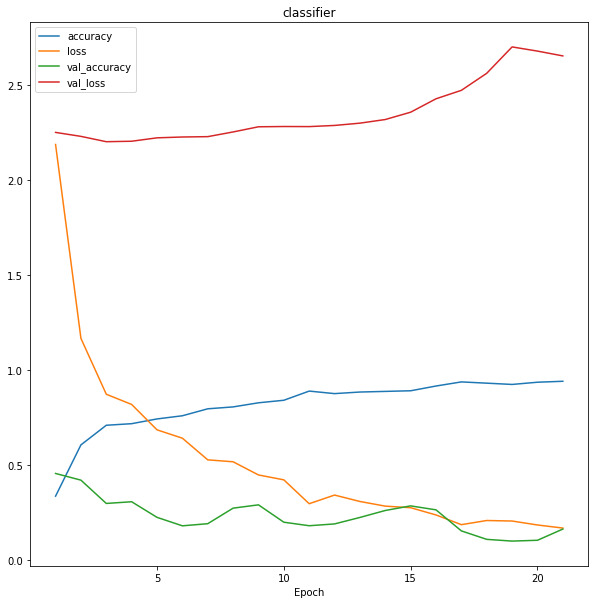

Experiment type Experiment classifier solo
Model index:  2
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.01, validate=True)
Model name:  classifier
Stopped epoch:  21
Best epoch:  1
Value to monitor:  val_accuracy
Monitor best value:  0.2675
metric: accuracy
Values:  [0,32333332, 0,595, 0,6666667, 0,74833333, 0,75166667, 0,79833335, 0,8, 0,8466667, 0,86333334, 0,88666666, 0,9066667, 0,905, 0,895, 0,92333335, 0,91, 0,9316667, 0,95, 0,92, 0,935, 0,9583333, 0,955]
metric: loss
Values:  [2,148109351793925, 1,1275265566507975, 0,9113818081219991, 0,7196639498074849, 0,6929057240486145, 0,5561950174967448, 0,5325658925374349, 0,47045607964197794, 0,42140166521072386, 0,3421485126018524, 0,3032797046502431, 0,2710370351870855, 0,3146025554339091, 0,23442732771237693, 0,25081205

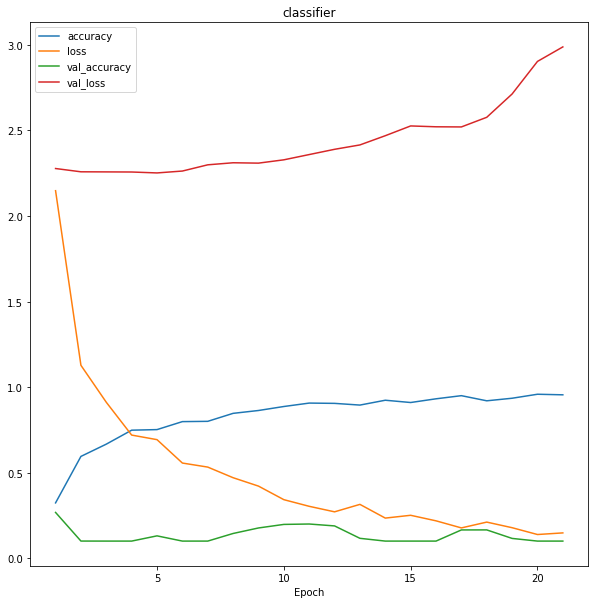

Experiment type Experiment classifier solo
Model index:  3
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.05, validate=True)
Model name:  classifier
Stopped epoch:  58
Best epoch:  38
Value to monitor:  val_accuracy
Monitor best value:  0.8755
metric: accuracy
Values:  [0,596, 0,7416667, 0,7723333, 0,802, 0,818, 0,84066665, 0,858, 0,85866666, 0,875, 0,88, 0,8886667, 0,8973333, 0,899, 0,903, 0,91466665, 0,931, 0,933, 0,9403333, 0,93266666, 0,939, 0,94133335, 0,94266665, 0,954, 0,95533335, 0,9536667, 0,96133333, 0,9583333, 0,9683333, 0,96666664, 0,962, 0,95966667, 0,96466666, 0,9673333, 0,96, 0,97433335, 0,9716667, 0,97366667, 0,97433335, 0,978, 0,9803333, 0,9763333, 0,974, 0,9776667, 0,97433335, 0,971, 0,986, 0,983, 0,9853333, 0,983, 0,9853333, 0,984, 0,984, 0,9853333, 0,9

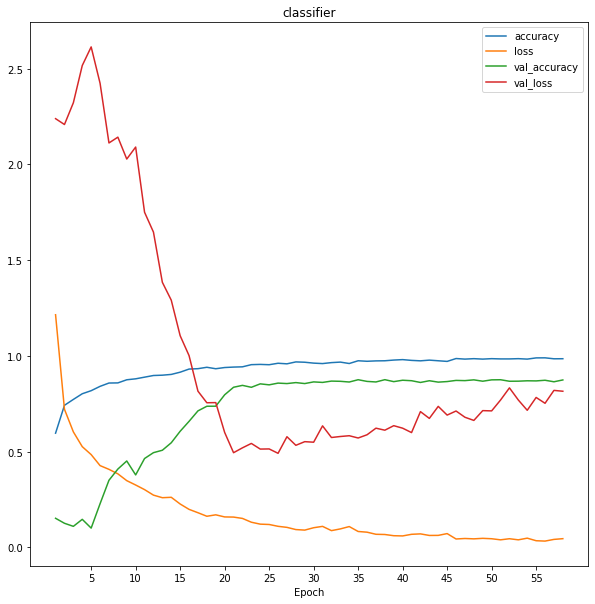

Experiment type Experiment classifier solo
Model index:  4
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.05, validate=True)
Model name:  classifier
Stopped epoch:  74
Best epoch:  54
Value to monitor:  val_accuracy
Monitor best value:  0.8822
metric: accuracy
Values:  [0,542, 0,72466666, 0,7673333, 0,80266666, 0,819, 0,834, 0,8513333, 0,86766666, 0,86766666, 0,888, 0,8973333, 0,89966667, 0,9023333, 0,915, 0,91566664, 0,92333335, 0,925, 0,931, 0,938, 0,94166666, 0,942, 0,95233333, 0,954, 0,948, 0,94233334, 0,9546667, 0,965, 0,96433336, 0,9626667, 0,96533334, 0,9636667, 0,96666664, 0,9713333, 0,97366667, 0,966, 0,9716667, 0,97533333, 0,97533333, 0,97066665, 0,972, 0,966, 0,97366667, 0,97033334, 0,9773333, 0,9803333, 0,982, 0,9773333, 0,978, 0,98066664, 0,9813333, 0,9833333

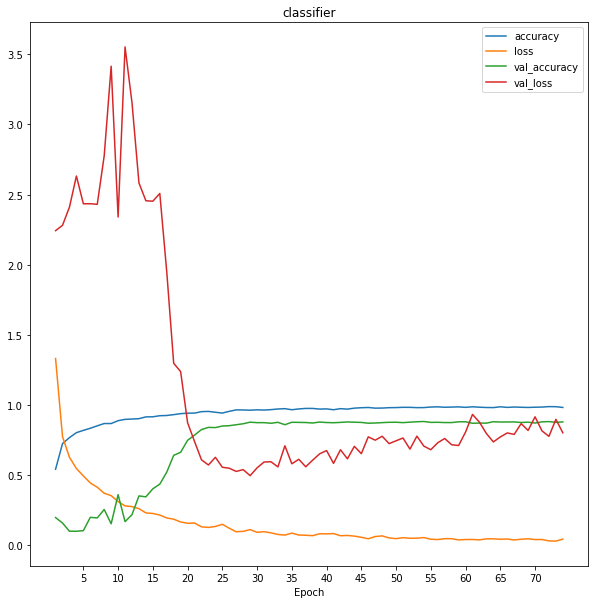

Experiment type Experiment classifier solo
Model index:  5
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.1, validate=True)
Model name:  classifier
Stopped epoch:  60
Best epoch:  40
Value to monitor:  val_accuracy
Monitor best value:  0.8958
metric: accuracy
Values:  [0,647, 0,778, 0,81383336, 0,8348333, 0,8498333, 0,863, 0,8731667, 0,8821667, 0,8925, 0,89633334, 0,912, 0,9138333, 0,918, 0,9305, 0,9253333, 0,93233335, 0,93916667, 0,9425, 0,945, 0,94883335, 0,951, 0,9505, 0,958, 0,9558333, 0,96283334, 0,962, 0,9673333, 0,96283334, 0,9725, 0,97283334, 0,9741667, 0,9676667, 0,96816665, 0,9751667, 0,97716665, 0,97566664, 0,978, 0,9776667, 0,9763333, 0,97866666, 0,979, 0,97833335, 0,98066664, 0,9815, 0,9838333, 0,98333335, 0,981, 0,98183334, 0,98216665, 0,98233336, 0,97833335

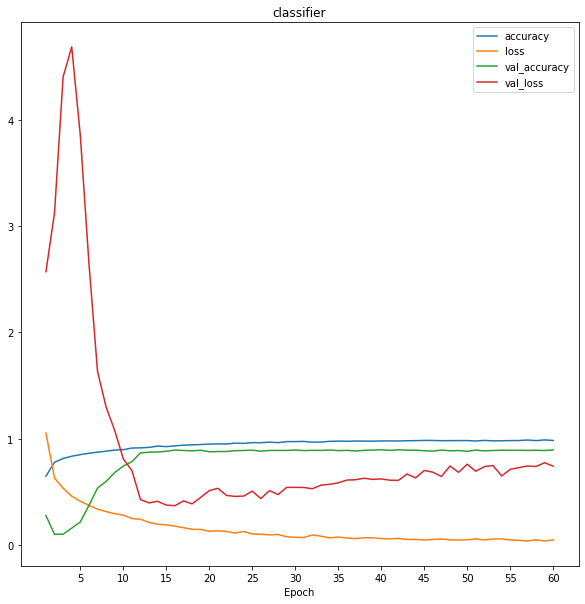

Experiment type Experiment classifier solo
Model index:  6
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.1, validate=True)
Model name:  classifier
Stopped epoch:  91
Best epoch:  71
Value to monitor:  val_accuracy
Monitor best value:  0.8979
metric: accuracy
Values:  [0,6228333, 0,7618333, 0,80733335, 0,82, 0,8438333, 0,8535, 0,8678333, 0,87916666, 0,8806667, 0,8925, 0,8998333, 0,90783334, 0,91216666, 0,9155, 0,9206667, 0,9315, 0,9281667, 0,9368333, 0,93633336, 0,9456667, 0,94116664, 0,9486667, 0,949, 0,9543333, 0,9511667, 0,9548333, 0,9625, 0,96133333, 0,961, 0,96183336, 0,9648333, 0,96716666, 0,9686667, 0,9688333, 0,9713333, 0,9715, 0,975, 0,9765, 0,97783333, 0,9685, 0,9738333, 0,97966665, 0,9765, 0,9775, 0,98116666, 0,98066664, 0,9816667, 0,97716665, 0,98066664, 0,979

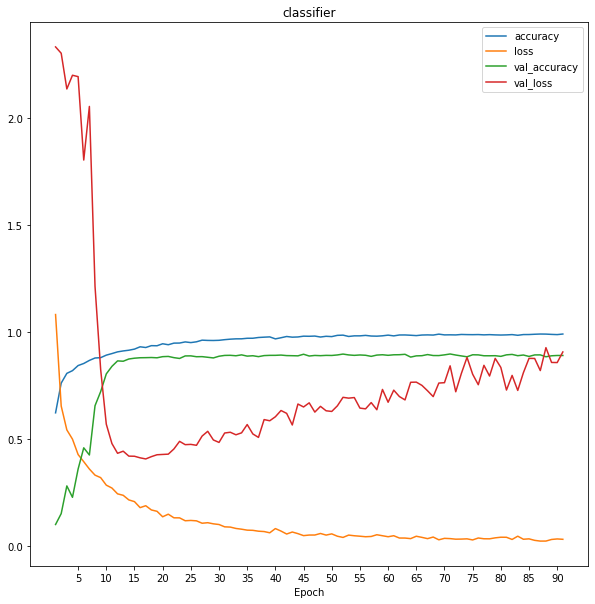

Experiment type Experiment classifier solo
Model index:  7
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.25, validate=True)
Model name:  classifier
Stopped epoch:  43
Best epoch:  23
Value to monitor:  val_accuracy
Monitor best value:  0.9155
metric: accuracy
Values:  [0,7055333, 0,81306666, 0,8387333, 0,8563333, 0,8670667, 0,878, 0,8878, 0,8958, 0,90073335, 0,9069333, 0,909, 0,91693336, 0,9248667, 0,92826664, 0,93453336, 0,9360667, 0,93686664, 0,9434, 0,945, 0,94893336, 0,9492667, 0,95206666, 0,94766665, 0,95606667, 0,9586, 0,9587333, 0,95966667, 0,9605333, 0,9602, 0,96433336, 0,9677333, 0,96846664, 0,96653336, 0,9713333, 0,9696, 0,96973336, 0,9749333, 0,9736, 0,97386664, 0,9734667, 0,97606665, 0,9748667, 0,977]
metric: loss
Values:  [0,8450119581858317, 0,5250285105705

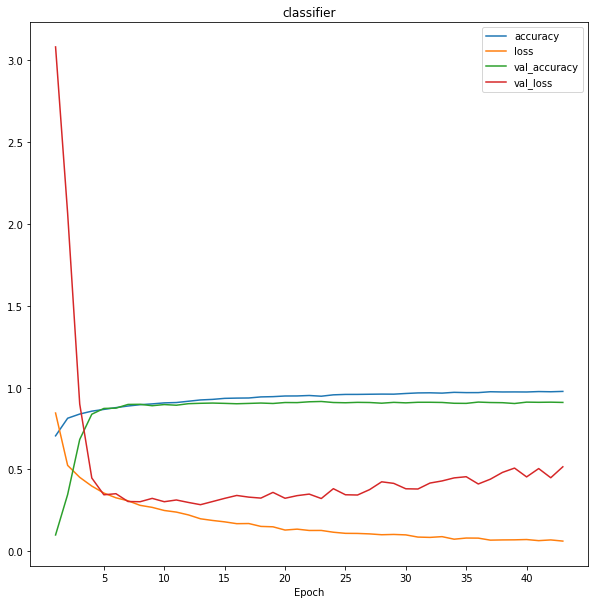

Experiment type Experiment classifier solo
Model index:  8
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.25, validate=True)
Model name:  classifier
Stopped epoch:  59
Best epoch:  39
Value to monitor:  val_accuracy
Monitor best value:  0.916
metric: accuracy
Values:  [0,7064667, 0,79946667, 0,82986665, 0,854, 0,86686665, 0,8786, 0,88566667, 0,89593333, 0,8982667, 0,9076667, 0,91573334, 0,9202, 0,9224, 0,92793334, 0,9308, 0,9324667, 0,93766665, 0,9410667, 0,94553334, 0,9476, 0,94993335, 0,95126665, 0,9518667, 0,9546667, 0,9594667, 0,95806664, 0,96146667, 0,9645333, 0,96346664, 0,9673333, 0,968, 0,9677333, 0,9645333, 0,9688, 0,96886665, 0,97073334, 0,9719333, 0,9734667, 0,9722, 0,9755333, 0,97386664, 0,9763333, 0,9755333, 0,9767333, 0,97713333, 0,9774, 0,97826666, 0,979933

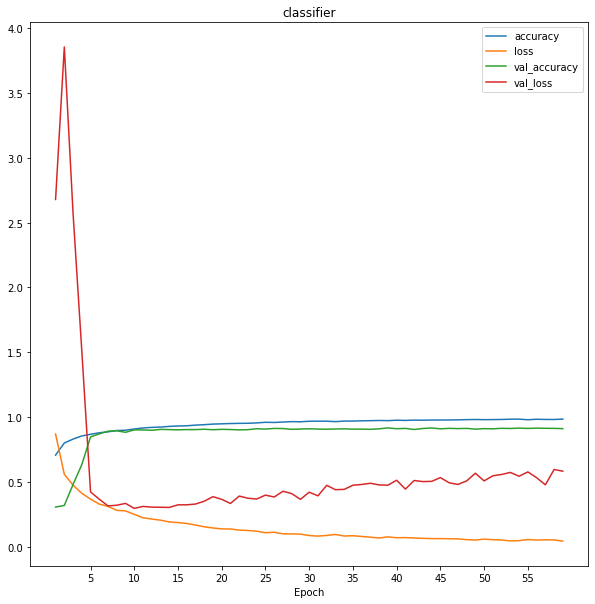

Experiment type Experiment classifier solo
Model index:  9
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.5, validate=True)
Model name:  classifier
Stopped epoch:  81
Best epoch:  61
Value to monitor:  val_accuracy
Monitor best value:  0.9269
metric: accuracy
Values:  [0,7668333, 0,8461667, 0,86983335, 0,8822333, 0,8910667, 0,9002, 0,91036665, 0,9127, 0,9181333, 0,92216665, 0,9278333, 0,9300333, 0,9328, 0,9368333, 0,93803334, 0,9426, 0,94266665, 0,9443667, 0,94886667, 0,9503667, 0,95516664, 0,9547, 0,95606667, 0,9582, 0,958, 0,96066666, 0,9629667, 0,96423334, 0,96243334, 0,9679667, 0,9654, 0,96723336, 0,96966666, 0,9703, 0,9696, 0,9702333, 0,9683333, 0,9702333, 0,97333336, 0,9724, 0,97356665, 0,9759, 0,9759, 0,9763, 0,97756666, 0,97496665, 0,97616667, 0,9784333, 0,9775, 0

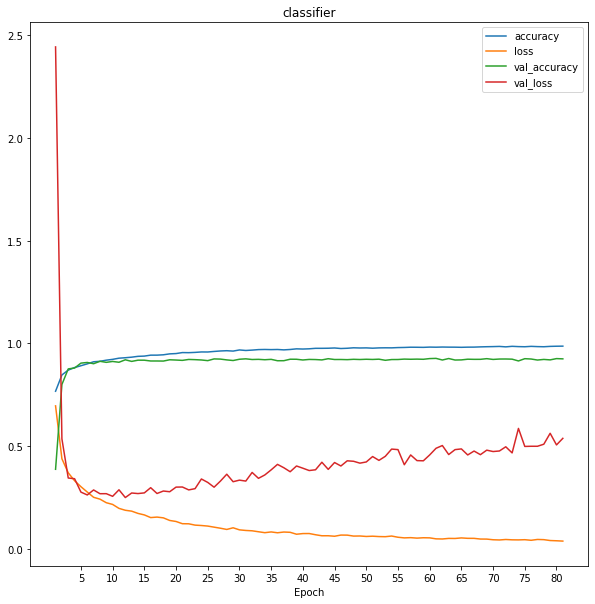

Experiment type Experiment classifier solo
Model index:  10
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.5, validate=True)
Model name:  classifier
Stopped epoch:  81
Best epoch:  61
Value to monitor:  val_accuracy
Monitor best value:  0.926
metric: accuracy
Values:  [0,76066667, 0,84323335, 0,8691, 0,8818333, 0,8929333, 0,9023, 0,9085, 0,91476667, 0,92036664, 0,9244, 0,9291, 0,93123335, 0,9355, 0,9382667, 0,9399, 0,94276667, 0,9461333, 0,94813335, 0,9518333, 0,9532667, 0,9547, 0,95573336, 0,9594333, 0,9583, 0,9591, 0,96286666, 0,9636, 0,9658667, 0,9667, 0,9655, 0,9658, 0,9677333, 0,9712, 0,96926665, 0,97076666, 0,9722, 0,9724333, 0,9719333, 0,97356665, 0,9723333, 0,97323334, 0,97426665, 0,9737, 0,97546667, 0,9774333, 0,97636664, 0,9795333, 0,9786, 0,97786665, 0,97783333

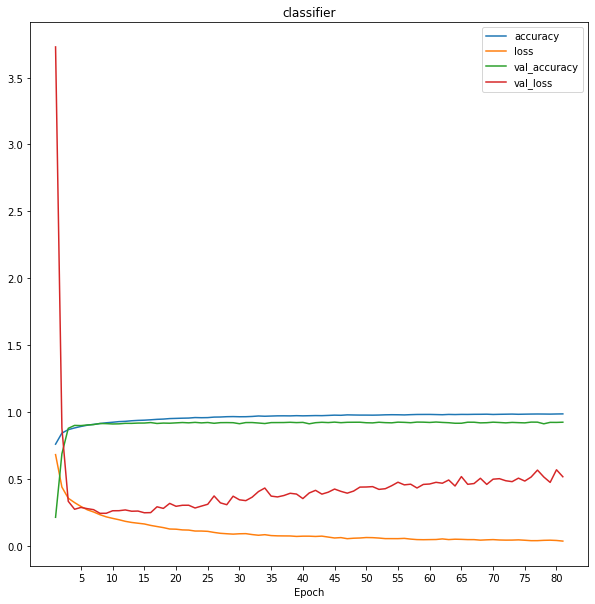

Experiment type Experiment classifier solo
Model index:  11
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=1, validate=True)
Model name:  classifier
Stopped epoch:  66
Best epoch:  46
Value to monitor:  val_accuracy
Monitor best value:  0.9364
metric: accuracy
Values:  [0,8043, 0,87053335, 0,89105, 0,9033, 0,91223335, 0,9167167, 0,92165, 0,92548335, 0,93105, 0,9338167, 0,93755, 0,9394, 0,9422, 0,94371665, 0,9469333, 0,94748336, 0,9496, 0,9533167, 0,9542, 0,95498335, 0,95585, 0,95806664, 0,95966667, 0,96035, 0,9623167, 0,9622333, 0,96318334, 0,9647167, 0,96445, 0,9662167, 0,96845, 0,96886665, 0,96925, 0,96886665, 0,9703, 0,97096664, 0,97138333, 0,97146666, 0,97248334, 0,97171664, 0,97263336, 0,97435, 0,9741333, 0,9748667, 0,97538334, 0,9761, 0,97671664, 0,9765667, 0,97683334

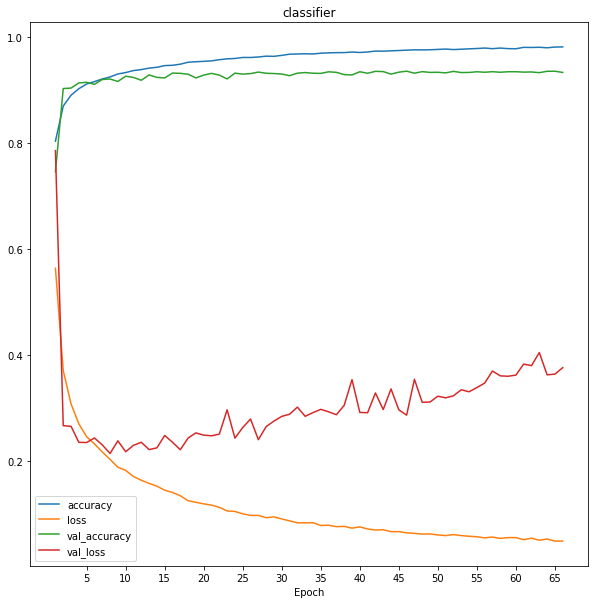

Experiment type Experiment classifier solo
Model index:  12
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=1, validate=True)
Model name:  classifier
Stopped epoch:  68
Best epoch:  48
Value to monitor:  val_accuracy
Monitor best value:  0.9373
metric: accuracy
Values:  [0,8060167, 0,87093335, 0,8882333, 0,9008, 0,9107, 0,91581666, 0,9220333, 0,92445, 0,9270333, 0,9317667, 0,93615, 0,93736666, 0,9417, 0,9439167, 0,946, 0,94715, 0,9501167, 0,9505, 0,95213336, 0,95421666, 0,95596665, 0,9576, 0,95706666, 0,9597833, 0,95991665, 0,96078336, 0,9634, 0,96363336, 0,9642, 0,9641333, 0,9662, 0,9668667, 0,96745, 0,96805, 0,96905, 0,96995, 0,97008336, 0,96945, 0,9701167, 0,97173333, 0,97248334, 0,97315, 0,9736, 0,9738333, 0,97355, 0,9738167, 0,97615, 0,97515, 0,97601664, 0,9755833, 0,97

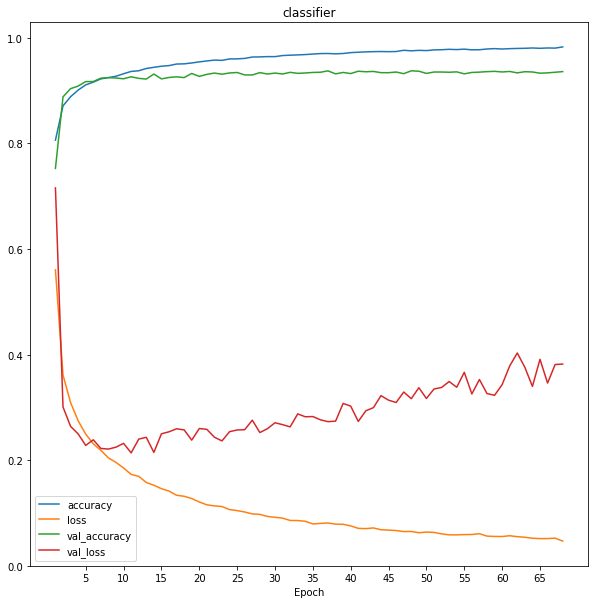

In [22]:
#trained_models = experiment.model_provider()
metrics = [ constants.Metrics.VAL_CLASSIFIER_OUT_ACCURACY, constants.Metrics.VAL_AUTOENCODER_OUT_LOSS]
params = vizualizer.VizualizeParams(0, 100, 5,False, False, None)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
#vizualizer.Vizualizer.vizualize([result.train_history for result in results], params)
vizualizer.Vizualizer.vizualize([result.train_history for result in results[:]], params)

In [0]:
import numpy as np
mnist = datasets.MnistDataset()
predictions_classifier = experiments.ExperimentClassifier.predict_train(mnist, trained_models_classifier)
predictions_classifier = np.argmax(predictions_classifier, axis = 1)
#test_images = mnist.get_test_images()


In [0]:
incorrect_classifier = [i for i, value in enumerate(fashion_mnist.get_test_labels()) if predictions_classifier[i] != value]
correct_classifier = [i for i, value in enumerate(fashion_mnist.get_test_labels()) if predictions_classifier[i] == value]
len(incorrect_classifier)

In [0]:
#test_images[incorrect_classifier]
#trained_models_autoencoder.autoencoder.evaluate(test_images[incorrect_classifier],test_images[incorrect_classifier], verbose=2)
trained_models_autoencoder.autoencoder.evaluate(test_images[correct_classifier],test_images[correct_classifier], verbose=2)
#trained_models_autoencoder.autoencoder.evaluate(test_images,test_images, verbose=2)
#incorrect_classifier

In [0]:
len(correct_classifier)

In [0]:
# #ev = experiments.ExperimentAutoencoder.evaluate_on_train(datasets.MnistDataset() ,trained_models)
# fashion_mnist_incorrect = []
# for index in incorrect_classifier:
#     image = fashion_mnist.get_test_images()[index]
#     image = image.reshape(1, 28, 28, 1)
#     evaluation = trained_models_autoencoder.autoencoder.evaluate(image, image, verbose = 0)
#     fashion_mnist_incorrect.append(evaluation)


In [0]:
from matplotlib import pyplot as plt

bins = np.linspace(0,0.6 , 8)

plt.hist(fashion_mnist_correct, bins, alpha=0.5, label='Fashion mnist correct')
plt.hist(fashion_mnist_incorrect, bins, alpha=0.5, label='Fashion mnist incorrect')
plt.xlabel("Reconstruction error")
plt.ylabel("Number of samples")
plt.legend(loc='upper right')
plt.show()
print(max(fashion_mnist_correct))
print(max(fashion_mnist_incorrect))


In [0]:
with open('fashion_mnist_incorrect.txt', 'w') as file:
    for index, number in enumerate(fashion_mnist_incorrect):
        file.write(str(number))
        if index != (len(fashion_mnist_incorrect) - 1):
            file.write('\n')

In [0]:
with open( 'fashion_mnist_incorrect.txt', 'r') as file:
    fashion_mnist_incorrect = []
    for line in file:
        fashion_mnist_incorrect.append(float(line))
with open( 'fashion_mnist_correct.txt', 'r') as file:
    fashion_mnist_correct = []
    for line in file:
        fashion_mnist_correct.append(float(line))
print(np.mean(fashion_mnist_incorrect))
print(np.mean(fashion_mnist_correct))
print(np.std(fashion_mnist_incorrect))
print(np.std(fashion_mnist_correct))
print(len(fashion_mnist_correct))
print(len(fashion_mnist_incorrect))

In [0]:
last_layer = trained_models_classifier.classifier.layers[-1]
print(last_layer.activation)

In [0]:
trained_models_classifier.make_classifier_without_activation()
#trained_models_classifier.make_classifier_with_sigmoid_activation()
#spomenut ho, ze bol - histogram sposobil, ze hodnoty boli viac na sebe a pre opacne datasety su podobne, neoddeli mi data. 
#trained_models_classifier.make_classifier_with_softmax_activation()

In [0]:
predictors.Predictor.predict_for_subclasses(datasets.FashionMnistDataset(),  datasets.MnistDataset(), trained_models_classifier, 10)

In [0]:
my_classes, distance = predictors.SquereDistanceFromMean().predict_test_based_on_train_treshoald( datasets.MnistDataset(), trained_models, 10.0)
#my_classes, distance = predictors.SquereDistanceFromMean().predict_train( datasets.FashionMnistDataset(), trained_models, None)
vizualizer.Vizualizer.plot_bins(distance, 10)

In [0]:
import numpy as np
np.percentile(distance, 10)

In [0]:
from abc import ABC, abstractmethod

class Predictor(ABC):
    def predict_train(self, dataset, model, threashold = None):
        return self.predict(dataset.get_train_images(), dataset.get_train_labels(), model, threashold)
        
    def predict_test(self, dataset, model, threashold = None):
        return self.predict(dataset.get_test_images(), dataset.get_test_labels(), model, threashold)
        
    def predict_test_based_on_train_treshoald(self, dataset, model, percentile):
        _, distance_train = self.predict_train(dataset, model)
        threashold_for_test =  np.percentile(distance_train, percentile)
        return self.predict_test(dataset, model, threashold_for_test), threashold_for_test
    
    @abstractmethod
    def predict(self, images, labels , model, threashold):
        pass
    

class AbsDistanceFromPredicted(Predictor):    
    
    def predict(self, images, labels , model, threashold):
        predictions = model.classifier.predict(images)
        my_classes = predictions.argmax(axis = 1)
        distances = np.zeros_like(my_classes)
        for index, _ in enumerate(predictions):
            classes_values = predictions[index]
            my_predicted_class = my_classes[index]
            distance = 0.0
            for index_class_value, class_value in enumerate(classes_values):
                if index_class_value == my_predicted_class:
                    continue
                distance += abs(classes_values[my_predicted_class] - class_value)
            if threashold is not None and distance < threashold:
                my_classes[index] = -1
            distances[index] = distance
        print("correct: ", (labels == my_classes).sum() ) 
        print("unknown: ", (-1 == my_classes).sum() )
        return my_classes, distances


    
class SquereDistanceFromPredicted(Predictor):
    
    def predict(self, images, labels , model, threashold):
        predictions = model.classifier.predict(images)
        my_classes = predictions.argmax(axis = 1)
        distances = np.zeros_like(my_classes)
        for index, _ in enumerate(predictions):
            classes_values = predictions[index]
            my_predicted_class = my_classes[index]
            distance = 0.0
            for index_class_value, class_value in enumerate(classes_values):
                if index_class_value == my_predicted_class:
                    continue
            
                distance += np.square(classes_values[my_predicted_class] - class_value)
            #distance /= (len(classes_values) - 1)
            if threashold is not None and distance < threashold:
                my_classes[index] = -1
            distances[index] = distance
        print("correct: ", (labels == my_classes).sum() ) 
        print("unknown: ", (-1 == my_classes).sum() )
        return my_classes, distances
    
class SumAbs(Predictor):

    def predict(self, images, labels , model, threashold):
        predictions = model.classifier.predict(images)
        my_classes = predictions.argmax(axis = 1)
        sums = np.zeros_like(my_classes)
        for index, _ in enumerate(predictions):        
            classes_values = predictions[index]
            sum_values = np.sum(np.absolute(classes_values)) 
            if threashold is not None and sum_values < threashold:
                my_classes[index] = -1
            sums[index] = sum_values
        print("correct: ", (labels == my_classes).sum() ) 
        print("unknown: ", (-1 == my_classes).sum() )
        return my_classes, sums

class SumSquere(Predictor):    
    
    def predict(self, images, labels , model, threashold):
        predictions = model.classifier.predict(images)
        my_classes = predictions.argmax(axis = 1)
        sums = np.zeros_like(my_classes)
        for index, _ in enumerate(predictions):        
            classes_values = predictions[index]
            sum_values = np.sum(np.square(classes_values)) 
            if threashold is not None and sum_values < threashold:
                my_classes[index] = -1
            sums[index] = sum_values
        print("correct: ", (labels == my_classes).sum() ) 
        print("unknown: ", (-1 == my_classes).sum() )
        return my_classes, sums


# na zaklade hodnoty maximalnej predikovanej hodnoty a thresholdu, ziadna suma ani vzdialenost
# 13.26
class MaxArgPredictor(Predictor):

    def predict(self, images, labels , model, threashold):
        predictions = model.classifier.predict(images)
        my_classes = predictions.argmax(axis = 1)
        sums = np.zeros_like(my_classes)
        for index, _ in enumerate(predictions):        
            class_value = predictions[index][my_classes[index]]
            if threashold is not None and class_value < threashold:
                my_classes[index] = -1
        print("correct: ", (labels == my_classes).sum() ) 
        print("unknown: ", (-1 == my_classes).sum() )
        predictions = np.max(predictions, axis = 1) 
        return my_classes, predictions
    

#my_classes, distances = predict_with_unknown_class_squere_distance_from_predicted(datasets.MnistDataset(), trained_models, 9108.0)
#my_classes, distances = predict_with_unknown_class_squere_distance_from_predicted(datasets.FashionMnistDataset(), trained_models, 9108.0)
    

In [0]:
predictors = Predictor.__subclasses__()
threashoald_list = []
for predictor in predictors:
    print(predictor.__name__)
    instance = predictor()
    (_, __), threashoald = instance.predict_test_based_on_train_treshoald(datasets.MnistDataset(), trained_models, 10)
    threashoald_list.append(threashoald)

In [0]:
for index, predictor in enumerate(predictors):
    print(predictor.__name__)
    instance = predictor()
    print("Threashold: ", threashoald_list[index])
    instance.predict_test(datasets.MnistDataset(), trained_models, threashoald_list[index])

In [0]:
fashion_mnist =  datasets.MnistDataset()
fashion_mnist.get_test_labels()
correct_predict = np.argmax( predictions, axis = 1) == fashion_mnist.get_test_labels()
predictions = predictions[correct_predict]
predictions = np.max(predictions, axis = 1)

In [0]:
def plot_bins(predictions, number_of_bins):
    import numpy as np
    import matplotlib.pyplot as plt
    bins = np.linspace( predictions.min() - 0.01 , predictions.max() + 0.01, num=number_of_bins)

    def bins_labels(bins, **kwargs):
        bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
        plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
        plt.xlim(bins[0], bins[-1])

    print(bins)
    fig, ax = plt.subplots(1,1)
    hist = ax.hist(predictions , bins=bins)
    labels = [str(count) for count in hist[0]]
    #labels.insert(0, 0)
    print(labels)
    #ax.set_xticklabels(labels)
    plt.show()
    return bins, labels

mnist_bins, mnist_labels = plot_bins(distances, 20)
#fashion_mnist_bins, fashion_mnist_labels = plot_bins(fashion_mnist_predictions, 9)


In [0]:
def print_intervals(bins, labels):
    for index, bin in enumerate(bins[:-1]):
        print("interval: <{:.4f} - {:.4f}, count:{})".format(bins[index] , bins[index  + 1], labels[index]))
#print_intervals(fashion_mnist_bins, fashion_mnist_labels)
print_intervals(mnist_bins, mnist_labels)

In [0]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000), rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(a, bins=[-5, 0, 5, 10])  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [0]:
# from keras.utils import plot_model
# keras.utils.plot_model(models.auto_classifier, show_shapes=True, to_file = 'model_combined.png')
import global_functions, constants, vizualizer, experiments
logs = global_functions.get_files_in_dir_with_extension(constants.Paths.OUTPUT_DIRECTORY, ".json" )


In [0]:
import vizualizer, experiments
results = experiments.ExperimentBase.load_experiment_results(constants.ExperimentsPaths.FashionMnist.AUTOENCODER2_CLASSIFIER1_AUTO_L_OFF)
vizualizer.Vizualizer.vizualize([result.train_history for result in results], 0.5)

    

In [0]:
model = results[-1].experiment.model_provider()
model.classifier .summary()

In [0]:
import vizualizer
import importlib
importlib.reload(vizualizer)
vizualizer.Vizualizer.show_autoencoder_images(datasets.FashionMnistDataset(), data.test_y,  predictions, 5)

In [0]:
def make_batches(to_batch, batch_size = 128):
    return [to_batch[i * batch_size:(i + 1) * batch_size] for i in range((len(to_batch) + batch_size - 1) // batch_size )]

batch_size = 128
to_batch = tf.data.Dataset.from_tensor_slices((train_images, keras.utils.to_categorical(train_labels, 10) ))
train_batched = to_batch.batch(batch_size)

In [0]:
epochs = 10
for epoch in range(epochs):
    print("Epoch: {}", epoch)
    for step, (images, labels) in enumerate(train_batched):
        set_autoencoder_trainable(True)
        with tf.GradientTape() as tape:
          prediction = autoencoder(images)
          loss_autoencoder = autoencoder.loss(images, prediction)
          gradients = tape.gradient(loss_autoencoder, autoencoder.trainable_variables)
          autoencoder.optimizer.apply_gradients(zip(gradients, autoencoder.trainable_variables))  
        set_autoencoder_trainable(False)
        with tf.GradientTape() as tape:
          predict_class = classifier(images)
          loss_classifier = classifier.loss(labels, predict_class)  
#           classiefier_trainable = classifier_head.trainable_variables
          classiefier_trainable = classifier.trainable_variables
          gradients = tape.gradient(loss_classifier, classiefier_trainable)
          classifier.optimizer.apply_gradients(zip(gradients  ,classiefier_trainable) ) 
          if step % 10 == 0:
              print("Step: {}, loss autoencoder: {}, loss classifier: {}".format(step, loss_autoencoder.numpy().mean(), loss_classifier.numpy().mean()))


In [0]:
for epoch in range(5):
  print("Classifier")
  historyClassifier = classifier.fit(x = train_images, y = train_labels_one_hot_encoding, batch_size=128, epochs=1, validation_data= (test_images, test_labels_one_hot_encoding))

In [0]:
predictions_auto_encoder, predictions_classifier = auto_classifier.predict(test_images)
predictions_classifier = np.argmax(np.round(predictions_classifier),axis=1)
correct = np.where(predictions_classifier==test_labels)[0]
print( "Found {} correct labels".format(len(correct)))

In [0]:

test_eval = classifier.evaluate(test_images, test_labels_one_hot_encoding, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
predicted_classes = classifier.predict(test_images)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes = predicted_classes.astype('uint8')
correct = [predicted_classes[i] == value for i, value in enumerate(test_labels)]
print("Correct: {}".format( correct.count(True)))


